In [ ]:
'''
Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
'''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
month = np.arange(Max.size)

Text(0, 0.5, 'Temperature(C)')

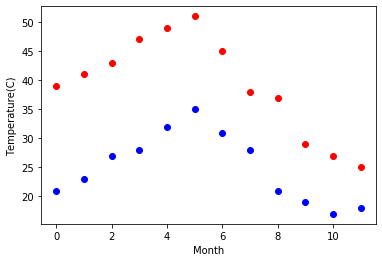

In [5]:
plt.plot(month,Max,'ro')
plt.plot(month,Min,'bo')
plt.xlabel('Month')
plt.ylabel('Temperature(C)')

In [11]:
days = np.linspace(0, Max.size)
days

array([ 0.        ,  0.24489796,  0.48979592,  0.73469388,  0.97959184,
        1.2244898 ,  1.46938776,  1.71428571,  1.95918367,  2.20408163,
        2.44897959,  2.69387755,  2.93877551,  3.18367347,  3.42857143,
        3.67346939,  3.91836735,  4.16326531,  4.40816327,  4.65306122,
        4.89795918,  5.14285714,  5.3877551 ,  5.63265306,  5.87755102,
        6.12244898,  6.36734694,  6.6122449 ,  6.85714286,  7.10204082,
        7.34693878,  7.59183673,  7.83673469,  8.08163265,  8.32653061,
        8.57142857,  8.81632653,  9.06122449,  9.30612245,  9.55102041,
        9.79591837, 10.04081633, 10.28571429, 10.53061224, 10.7755102 ,
       11.02040816, 11.26530612, 11.51020408, 11.75510204, 12.        ])

In [14]:
def test(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(test, month, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(test, month, Min, [-40, 20, 0])


Text(0, 0.5, 'Temperature')

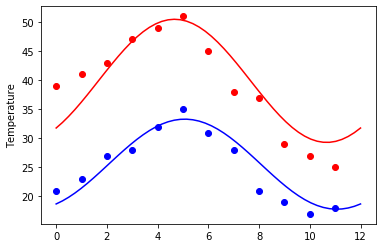

In [15]:
plt.plot(month, Max, 'ro')
plt.plot(days, temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, temps(days, *res_min), 'b-')
plt.ylabel('Temperature')

In [ ]:
'''
Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
'''

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
gender = titanic['sex'].astype('category')
gender.head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: category
Categories (2, object): [female, male]

In [21]:
gender=gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

In [22]:
gender.value_counts()

 1    843
 0    466
-1      1
dtype: int64

([<matplotlib.patches.Wedge at 0x1d1c9d11848>,
 [Text(-0.47930837991371283, 0.9900825606708221, 'female'),
  Text(0.47693272451693625, -0.9912291240096067, 'male'),
  Text(1.0999968373797648, -0.0026377555829792576, 'nan')],
 [Text(-0.2614409344983888, 0.5400450330931756, '64.4%'),
  Text(0.26014512246378335, -0.5406704312779672, '35.6%'),
  Text(0.599998274934417, -0.0014387757725341404, '0.1%')])

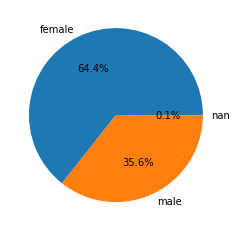

In [23]:
plt.pie(gender.value_counts(), labels = titanic['sex'].unique(), autopct='%1.1f%%')

AttributeError: 'PathCollection' object has no property 'hue'

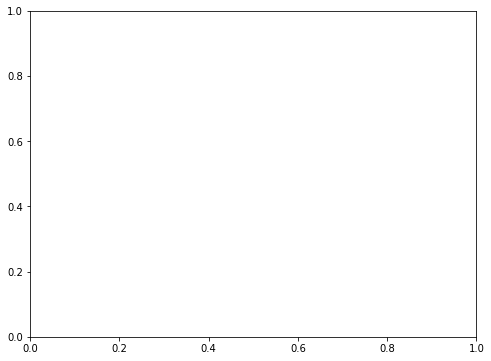

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'],titanic['fare'],hue=titanic['sex'])
plt.xlabel('Fare')
plt.ylabel('Age')